In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:

df.shape

(225745, 79)

In [6]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [7]:
df.columns = df.columns.str.strip()

In [17]:
df['Label'].value_counts() 
#target variable is: BENIGN

Label
DDoS      128027
BENIGN     97714
Name: count, dtype: int64

In [10]:
"""Data Cleaning"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null  float64
 13 

In [9]:
#CHECK NULL
df.isnull().sum().sort_values(ascending=False)

Flow Bytes/s            4
Destination Port        0
Bwd Avg Bytes/Bulk      0
Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk      0
                       ..
Bwd IAT Mean            0
Bwd IAT Total           0
Fwd IAT Min             0
Fwd IAT Max             0
Label                   0
Length: 79, dtype: int64

In [10]:
df = df.dropna(subset=['Flow Bytes/s'])

In [18]:
df.select_dtypes(include='object').columns
#Convert Categorical Columns (if any)

Index(['Label'], dtype='object')

In [19]:
df['Label'] = df['Label'].map({'BENIGN':0, 'DDoS':1})
df['Label'].value_counts()

Label
1    128027
0     97714
Name: count, dtype: int64

In [12]:
df.info()

df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225741 non-null  int64  
 1   Flow Duration                225741 non-null  int64  
 2   Total Fwd Packets            225741 non-null  int64  
 3   Total Backward Packets       225741 non-null  int64  
 4   Total Length of Fwd Packets  225741 non-null  int64  
 5   Total Length of Bwd Packets  225741 non-null  int64  
 6   Fwd Packet Length Max        225741 non-null  int64  
 7   Fwd Packet Length Min        225741 non-null  int64  
 8   Fwd Packet Length Mean       225741 non-null  float64
 9   Fwd Packet Length Std        225741 non-null  float64
 10  Bwd Packet Length Max        225741 non-null  int64  
 11  Bwd Packet Length Min        225741 non-null  int64  
 12  Bwd Packet Length Mean       225741 non-null  float64
 13  Bwd 

Destination Port        0
ECE Flag Count          0
Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk      0
Fwd Header Length.1     0
                       ..
Bwd IAT Total           0
Fwd IAT Min             0
Fwd IAT Max             0
Fwd IAT Std             0
Label                   0
Length: 79, dtype: int64

In [18]:
df.describe()

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225741.000000,2.257410e+05,225741.000000,225741.000000,225741.000000,2.257410e+05,225741.000000,225741.000000,225741.000000,225741.000000,...,225741.000000,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,225741.000000
mean,8879.294213,1.624194e+07,4.874972,4.572851,939.479993,5.960583e+03,538.545235,27.882715,164.829636,214.911050,...,21.482513,1.848294e+05,1.293459e+04,2.080886e+05,1.776232e+05,1.032233e+07,3.612007e+06,1.287836e+07,7.755493e+06,0.567141
std,19754.491905,3.152458e+07,15.423004,21.755541,3249.429866,3.921868e+04,1864.144128,163.325564,504.896961,797.417625,...,4.166390,7.979317e+05,2.102755e+05,9.002425e+05,7.842668e+05,2.185318e+07,1.275700e+07,2.692145e+07,1.983124e+07,0.495473
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.000000,7.118300e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,1.452362e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.000000,8.805245e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239754e+06,0.000000e+00,8.253869e+06,7.422871e+06,1.000000
max,65532.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


In [21]:
!pip install seaborn
!pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
plt.figure(figsize = (150,80))
sns.heatmap(df.corr(), annot = True , fmt=".2f", cmap = 'coolwarm')
plt.title("Feature Correlation Map")
plt.show()

In [25]:
corr = df.corr()['Label'].sort_values(ascending=False)
print(corr)

Label                     1.000000
Bwd Packet Length Mean    0.603293
Avg Bwd Segment Size      0.603293
Bwd Packet Length Max     0.577318
Bwd Packet Length Std     0.576150
                            ...   
Fwd Avg Packets/Bulk           NaN
Fwd Avg Bulk Rate              NaN
Bwd Avg Bytes/Bulk             NaN
Bwd Avg Packets/Bulk           NaN
Bwd Avg Bulk Rate              NaN
Name: Label, Length: 79, dtype: float64


In [20]:
#Feature & Label Split

X = df.drop('Label', axis=1)  # Features
y = df['Label']               # Target

In [21]:
#Train test split (80-20 rule of battle)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
#CHECK FOR INF VALUES
print("inf values:", np.isinf(X).sum().sum())
print("NaN values:", X.isna().sum().sum())
print("Max Value in X:", X.max().max())
print("Min Value in X:", X.min().min())

inf values: 60
NaN values: 0
Max Value in X: inf
Min Value in X: -12000000.0


In [23]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Mark them
X.dropna(inplace=True)                              # Remove rows

In [24]:
print("inf values left:", np.isinf(X).sum().sum())
print("NaN values left:", X.isna().sum().sum())
y = y.loc[X.index]  # Align target variable

df.to_csv('clean_cicids.csv', index=False)

inf values left: 0
NaN values left: 0


In [46]:
from sklearn.utils import check_array

# Final Purge
X_train = check_array(X_train, force_all_finite=True)
X_test = check_array(X_test, force_all_finite=True)
print("inf in X_train:", np.isinf(X_train).sum())
print("NaN in X_train:", np.isnan(X_train).sum())
print("Shape of X_train:", X_train.shape)
print("Data type of X_train:", X_train.dtype)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

inf in X_train: 0
NaN in X_train: 0
Shape of X_train: (180568, 78)
Data type of X_train: float64


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [49]:
#Scaling data before LR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
#Step 3 → Logistic Regression → First Battle Drill
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.9986930421106263
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143

[[19392    27]
 [   32 25692]]


AUC Score: 0.9997660861588467


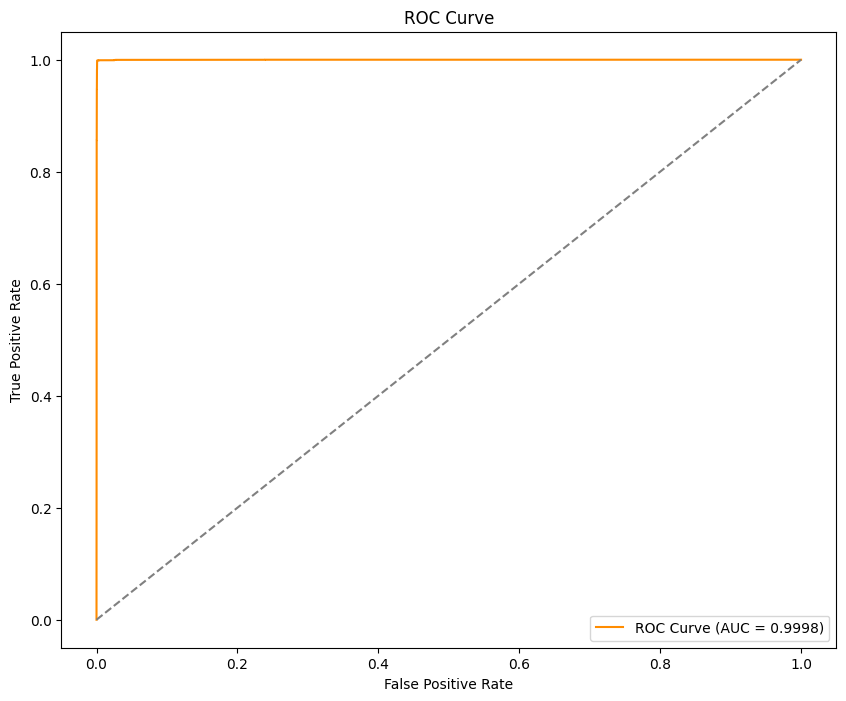

In [56]:
"""ROC & Feature Importance """
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#get probabilities
y_proba = lr.predict_proba(X_test)[:,1]

#Calculate ROC Values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

print("AUC Score:", auc_score)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='darkorange')
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Top 10 features:
ACK Flag Count                 13.782371
Flow IAT Mean                   8.616493
act_data_pkt_fwd                8.039201
Min Packet Length               7.763686
Bwd Header Length               6.983258
Total Backward Packets          6.500719
Subflow Bwd Packets             6.500719
Fwd PSH Flags                   6.440636
SYN Flag Count                  6.440636
Total Length of Fwd Packets     5.829257
dtype: float64


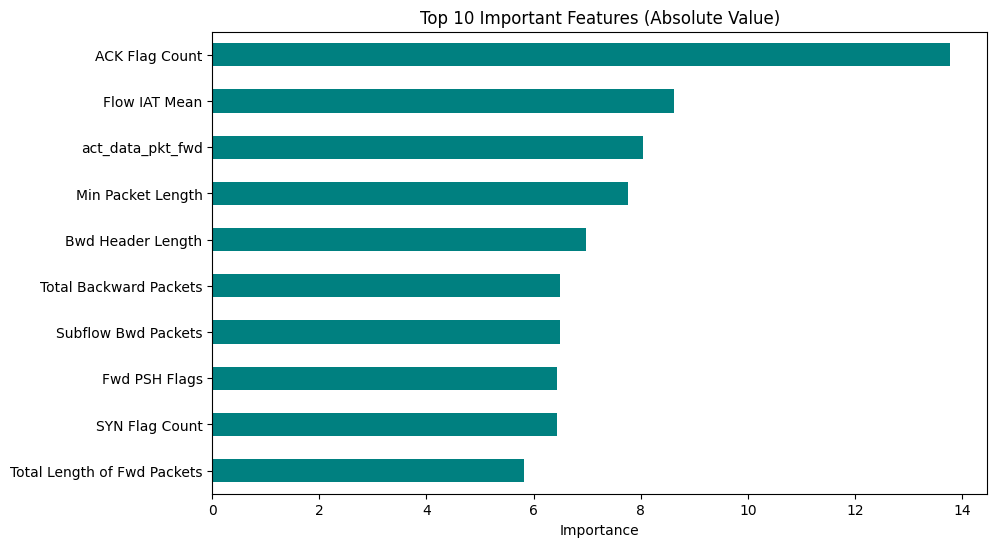

In [58]:
#Feature Importance (Spyglass Mode)
#Logistic Regression gives coefficients → Shows Impact of Features

importance = lr.coef_[0]

feat_imp = pd.Series(importance , index = X.columns)
feat_imp = feat_imp.abs().sort_values(ascending=False)

print("Top 10 features:")
print(feat_imp.head(10))

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features (Absolute Value)')
plt.xlabel('Importance')
plt.show()

In [59]:
"""Random Forest"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Deploying RandomForest Troops
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions from battlefield
y_pred = rf.predict(X_test)


Accuracy: 0.9999335445140997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143

[[19419     0]
 [    3 25721]]


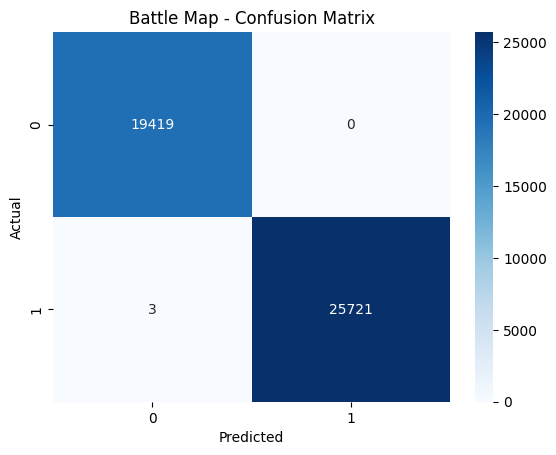

In [64]:

import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Intel
print("Accuracy:", rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

# Battle Map - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# cf matrix as heat map
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Battle Map - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


AUC Score: 0.9999999729748318


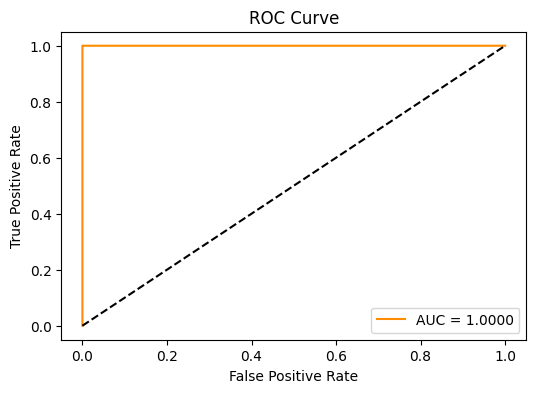

In [66]:
#ROC curve

from sklearn.metrics import  roc_auc_score, roc_curve
# ROC Curve Intel
y_probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)

#Plotting Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Top 10 Important Features from RandomForest:
Fwd Packet Length Mean         0.081234
Fwd Packet Length Max          0.076350
Avg Fwd Segment Size           0.074575
Init_Win_bytes_forward         0.061654
Subflow Fwd Bytes              0.050837
act_data_pkt_fwd               0.050253
Bwd Packet Length Min          0.042999
Total Length of Fwd Packets    0.042270
Destination Port               0.041121
Subflow Fwd Packets            0.039683
dtype: float64


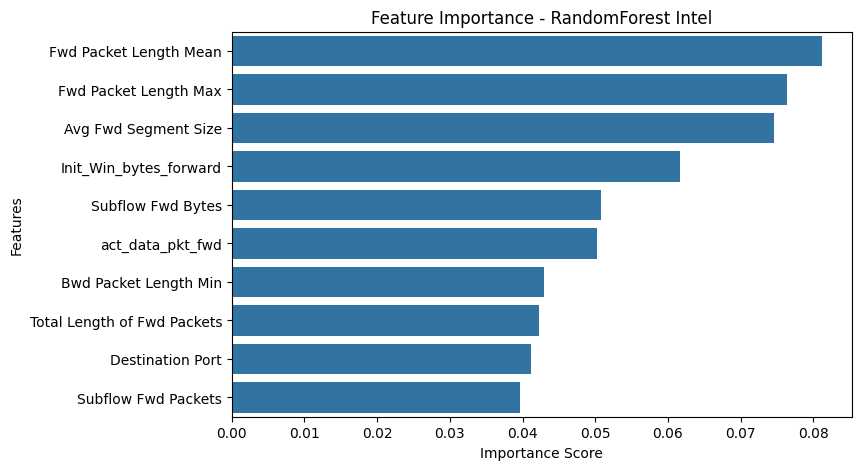

In [67]:
# Feature Importance from RandomForest
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features from RandomForest:")
print(feature_imp.head(10))

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Feature Importance - RandomForest Intel")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [69]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.8/150.0 MB 5.3 MB/s eta 0:00:28
    --------------------------------------- 2.9/150.0 MB 5.6 MB/s eta 0:00:27
   - -------------------------------------- 4.5/150.0 MB 6.1 MB/s eta 0:00:24
   - -------------------------------------- 6.0/150.0 MB 6.4 MB/s eta 0:00:23
   - -------------------------------------- 7.3/150.0 MB 6.5 MB/s eta 0:00:23
   -- ------------------------------------- 8.9/150.0 MB 6.5 MB/s eta 0:00:22
   -- ------------------------------------- 10.2/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 12.1/150.0 MB 6.8 MB/s eta 0:00:21
   --- ------------------------------------ 13.4/150.0 MB 6.8 MB/s eta 0:00:21
   --- ------------------------------------ 14.7/150.0 MB 6.7 MB/s eta 0:00:21
   ---- ----------------------------------- 16.3/150.0 MB 6.8 MB/s 

In [70]:
""" XGBoost Classifier"""

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the Model
xgb.fit(X_train, y_train)

#  Predictions
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:,1]


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:20:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [73]:
#Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9999778481713666
AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143

[[19418     1]
 [    0 25724]]


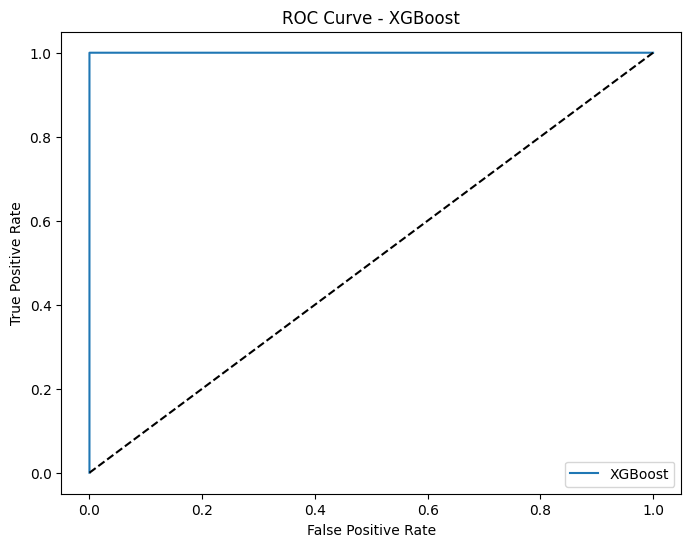

In [74]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

Top 10 Important Features from XGBoost:
Fwd Packet Length Mean         0.662827
Total Length of Fwd Packets    0.319720
Bwd Packet Length Mean         0.003572
Bwd Header Length              0.002485
Fwd Packet Length Max          0.001826
URG Flag Count                 0.001212
FIN Flag Count                 0.000850
Fwd Packet Length Std          0.000699
Destination Port               0.000688
Packet Length Std              0.000587
dtype: float32


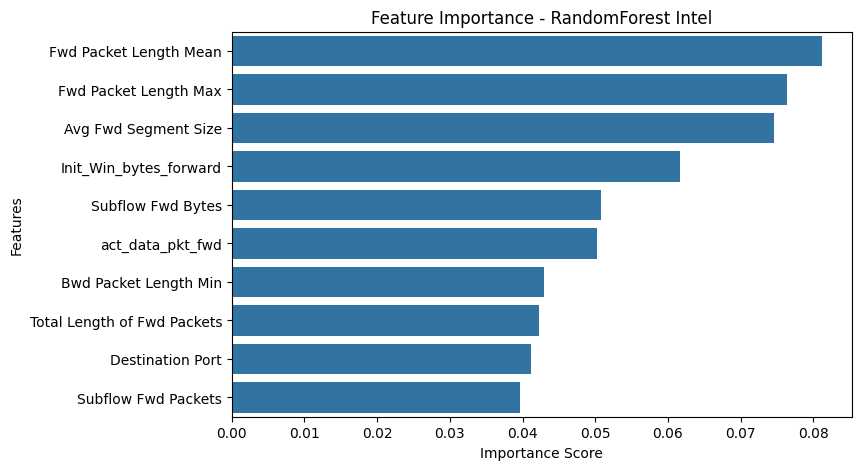

In [76]:
#Feature Importance
feat_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features from XGBoost:")
print(feat_importance.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Feature Importance - RandomForest Intel")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [77]:
!pip install joblib

In [79]:
import joblib

# A xgb_model is our trained model
joblib.dump(xgb, 'xgboost_cicids_model.pkl')

['xgboost_cicids_model.pkl']

In [81]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [2]:
df.to_csv('clean_cicids.csv', index=False)

NameError: name 'df' is not defined